<a href="https://colab.research.google.com/github/anusairam/anusairam/blob/main/Loan_Approval_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement : Loan Approval Prediction using Machine Learning

To design and implement a machine learning model to predict whether a loan application should be approved or denied based on various features provided in the loan dataset.
The goal is to develop a robust and accurate model that can assist financial institutions in making informed decisions regarding loan approvals.

Dataset Description:
The dataset contains information about loan applicants, including attributes such as age, income, credit history, loan amount, loan term, employment status, etc.
Each record in the dataset represents a loan application, and the target variable is the loan approval status (Approved or Denied).

Note: The project aims to develop a predictive model to assist in decision-making.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df = pd.read_csv("loan_data_set.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

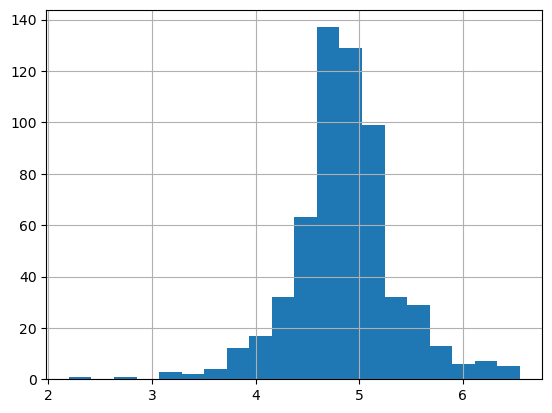

In [ ]:
df['loanAmount_log']= np.log(df[ 'LoanAmount'])

df["loanAmount_log"].hist(bins=20)

In [ ]:
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']  # Target variable

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

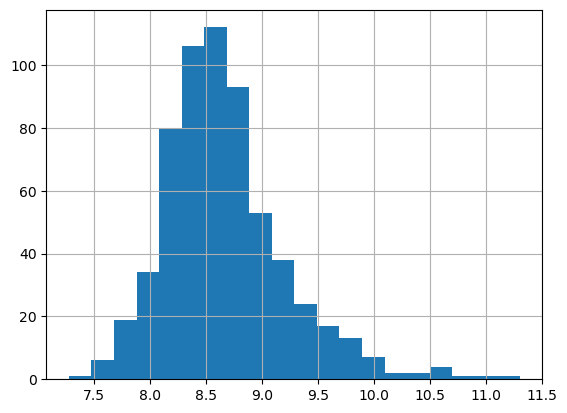

In [ ]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']

df['TotalIncome_log']= np.log(df['TotalIncome'])

df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['loanAmount_log'] = df['loanAmount_log'].fillna(df['loanAmount_log'].mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64


In [ ]:
x =df.iloc[:, np.r_[1:5,9:11,13:15]].values
y= df.iloc[:,12].values

In [ ]:
x,y

(array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
        ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
        ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
        ...,
        ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
        ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
        ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
       dtype=object),
 array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
        'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
        'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
        'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
        'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',

number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

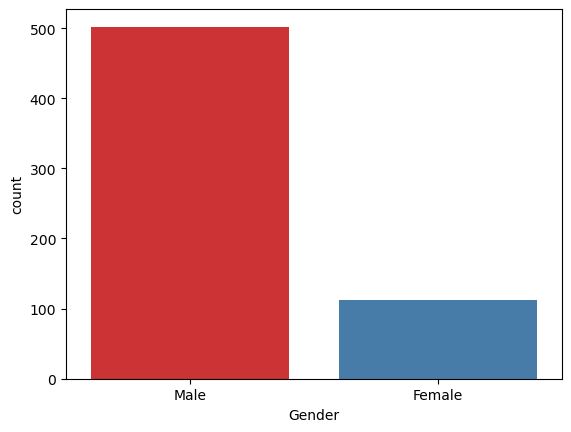

In [ ]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x="Gender", data=df, palette = 'Set1')

Number of people who take loan as grouped by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


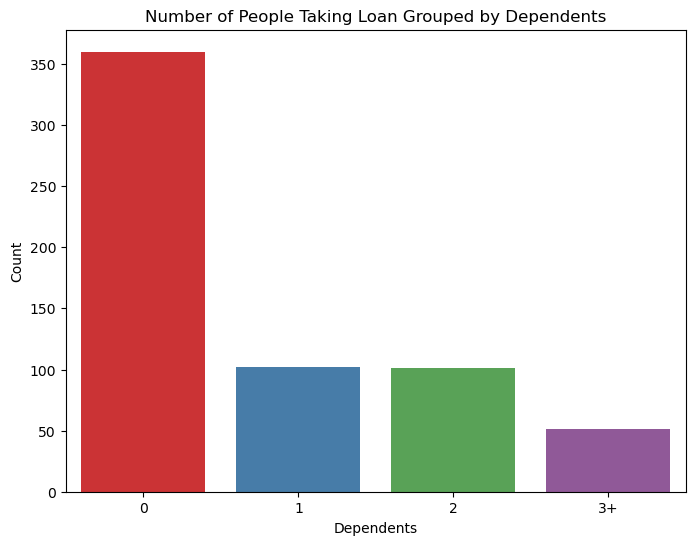

In [ ]:
print("Number of people who take loan as grouped by dependents:")
print(df['Dependents'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', data=df, palette='Set1')
plt.title('Number of People Taking Loan Grouped by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Number of people who take loan as grouped by self employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


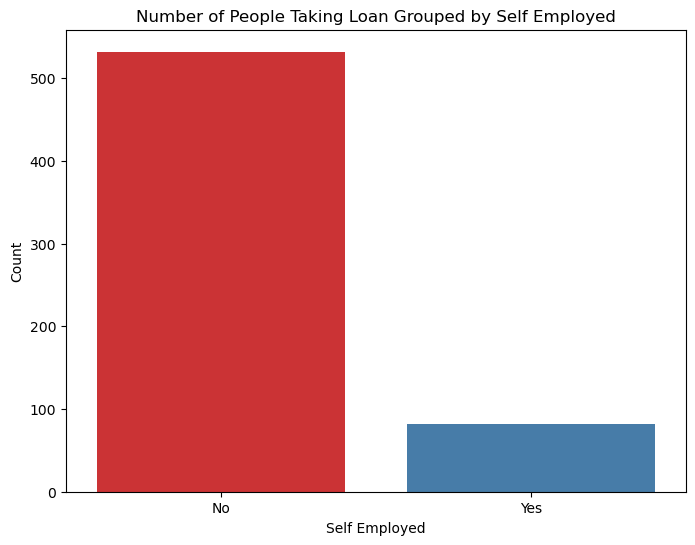

In [ ]:
print("Number of people who take loan as grouped by self employed:")
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Self_Employed', data=df, palette='Set1')
plt.title('Number of People Taking Loan Grouped by Self Employed')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

number of people who take loan as group by loanamount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

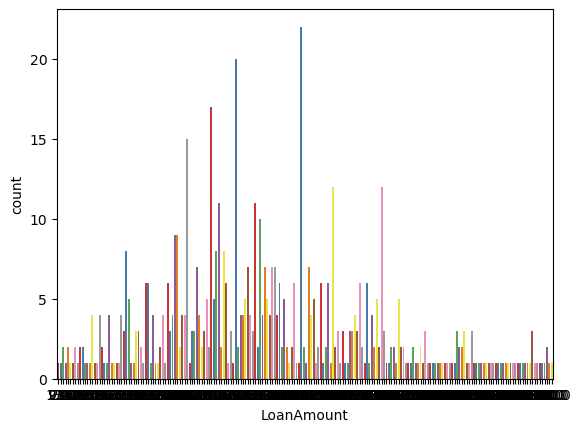

In [ ]:
print("number of people who take loan as group by loanamount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data =df,palette='Set1')

numbber of people who take loan as group by Credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

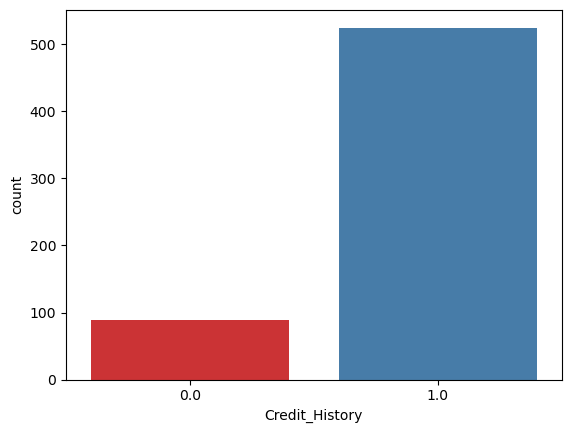

In [ ]:
print("numbber of people who take loan as group by Credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x= LabelEncoder()

In [ ]:
for i in range (0,5):
    X_train[:,1]=Labelencoder_x.fit_transform(X_train[:,1])
    X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])
X_train

array([['Male', 1, '0', ..., 1.0, 4.875197323201151, 267],
       ['Male', 0, '1', ..., 1.0, 5.278114659230517, 407],
       ['Male', 1, '0', ..., 0.0, 5.003946305945459, 249],
       ...,
       ['Male', 1, '3+', ..., 1.0, 5.298317366548036, 363],
       ['Male', 1, '0', ..., 1.0, 5.075173815233827, 273],
       ['Female', 1, '0', ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
Labelencoder_y=LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0, 5):
    X_test[:, i] = Labelencoder_x.fit_transform(X_test[:, i])
X_test[:, 7] = Labelencoder_x.fit_transform(X_test[:, 7])

print(X_test)

[[1 0 0 0 5 1.0 4.430816798843313 85]
 [0 0 0 0 5 1.0 4.718498871295094 28]
 [1 1 0 0 5 1.0 5.780743515792329 104]
 [1 1 0 0 5 1.0 4.700480365792417 80]
 [1 1 2 0 5 1.0 4.574710978503383 22]
 [1 1 0 1 3 0.0 5.10594547390058 70]
 [1 1 3 0 3 1.0 5.056245805348308 77]
 [1 0 0 0 5 1.0 6.003887067106539 114]
 [1 0 0 0 5 0.0 4.820281565605037 53]
 [1 1 0 0 5 1.0 4.852030263919617 55]
 [0 0 0 0 5 1.0 4.430816798843313 4]
 [1 1 1 0 5 1.0 4.553876891600541 2]
 [0 0 0 0 5 1.0 5.634789603169249 96]
 [1 1 2 0 5 1.0 5.4638318050256105 97]
 [1 1 0 0 5 1.0 4.564348191467836 117]
 [1 1 1 0 5 1.0 4.204692619390966 22]
 [1 0 1 1 5 1.0 5.247024072160486 32]
 [1 0 0 1 5 1.0 4.882801922586371 25]
 [0 0 0 0 5 1.0 4.532599493153256 1]
 [1 1 0 1 5 0.0 5.198497031265826 44]
 [0 1 0 0 5 0.0 4.787491742782046 71]
 [1 1 0 0 5 1.0 4.962844630259907 43]
 [1 1 2 0 5 1.0 4.68213122712422 91]
 [1 1 2 0 5 1.0 5.10594547390058 111]
 [1 1 0 0 5 1.0 4.060443010546419 35]
 [1 1 1 0 5 1.0 5.521460917862246 94]
 [1 0 0 0 5 1

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Anu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



CONCLUSION:
The model achieved an accuracy of approximately 78.86%, indicating that it correctly predicted loan approval status
(Yes or No) for about 78.86% of the samples in the test dataset.

Precision for class 'N' (No) is 0.95, which means that when the model predicted a loan as 'No', it was correct 95% of the time. However, the recall for class 'N' is 0.42,indicating that the model correctly identified only 42% of the actual 'No' loans.This suggests that the model is more conservative in predicting 'No' loans but may miss some actual 'No' cases.

Precision for class 'Y' (Yes) is 0.76, indicating that the model's accuracy in predicting 'Yes' loans was slightly lower at 76%. However, the recall for class 'Y' is high at 0.99, indicating that the model performed very well in identifying 'Yes' loans, capturing 99% of them. This suggests that the model is good at identifying 'Yes' loans but may have more false positives in predicting 'No' loans.

The weighted average F1-score for the model is 0.76, indicating a good balance between precision and recall across both classes. However, the F1-score for class 'N' is lower at 0.58 compared to the F1-score for class 'Y' at 0.86, indicating that the model's performance is better for predicting 'Yes' loans.

The 'support' column in the classification report shows the number of samples in each class. In this case, there were 43 samples labeled 'N' (No) and 80 samples labeled 'Y' (Yes) in the test dataset.

The model exhibits strong performance in predicting loan applications that should be approved ('Yes' class), as indicated by high precision (0.76) and recall (0.99) for this class. This means that the model accurately identifies the majority of loan applications that should be approved, with a low rate of false positives.